<a href="https://colab.research.google.com/github/Himatora/project_analitics/blob/master/%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

2025-05-22 05:56:36.950168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747893396.983904     372 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747893396.993237     372 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Подготовка данных**

In [ ]:
students = pd.read_csv('/kaggle/input/with-predmet/project_db.csv', sep=';')

In [ ]:
# Функция для парсинга строки в словарь
def parse_subject_grades(grade_str):
    if pd.isna(grade_str):
        return {}
    parts = grade_str.split(';')
    grades = {}
    for part in parts:
        if ':' in part:
            subject, grade = part.strip().split(':')
            grades[subject.strip()] = float(grade.strip())
    return grades

# Применим ко всем строкам
students['Grades_Dict'] = students['All_Grades_Per_Subject'].apply(parse_subject_grades)


def mean_grade(grades_dict):
    if not grades_dict:
        return None
    return sum(grades_dict.values()) / len(grades_dict)

print(students['Grades_Dict'])
students['Mean_Subject_Grade'] = students['Grades_Dict'].apply(mean_grade)
print('Работа с долгами')
debts_list=[]
for i in range(1325):
  debts_list.append(students['Debts_List'][i].split(','))
print(debts_list)

for i in range(len(students)):
    if isinstance(students['Grades_Dict'][i], dict) and isinstance(debts_list[i], list):
        for subject in debts_list[i]:
            subject = subject.strip()  # удаляем лишние пробелы
            if subject in students['Grades_Dict'][i]:
                students['Grades_Dict'][i][subject] = 'Долг'
print(students['Grades_Dict'][1])
# Добавляем отдельные столбцы для предметов и оценок
all_subjects = set()  # Используем множество для уникальных предметов
for grades_dict in students['Grades_Dict']:
    all_subjects.update(grades_dict.keys())

for subject in all_subjects:
    students[subject] = None

for index, row in students.iterrows():
    grades_dict = row['Grades_Dict']
    for subject, grade in grades_dict.items():
        students.loc[index, subject] = grade

# Заменяем NaN и None на 0 во всей таблице
students = students.fillna(0)

# Выводим всю таблицу
print(students)

# Или сохранение в CSV (рекомендуется для больших таблиц):
students.to_csv('students_with_all_columns.csv', index=False, sep=';', encoding='utf-8')

0       {'Иностранный язык': 5.0, 'Информатика': 3.0, ...
1       {'Основы деловой коммуникации': 3.0, 'Основы р...
2       {'Иностранный язык': 3.0, 'Информатика': 5.0, ...
3       {'Информатика': 5.0, 'Математика': 4.0, 'Основ...
4       {'Иностранный язык': 4.0, 'Информатика': 3.0, ...
                              ...                        
1320                                                   {}
1321                                                   {}
1322                                                   {}
1323                                                   {}
1324                                                   {}
Name: Grades_Dict, Length: 1325, dtype: object
Работа с долгами
[['Нет долгов'], ['( дисциплина по выбору )', ' Базы данных', ' Дискретная математика', ' Иностранный язык', ' Интеллектуальные системы и технологии', ' Нейросетевые технологии', ' Объектно-ориентированное программирование', ' Операционные системы', ' Основы мобильной разработки', ' Основы российс

/tmp/ipykernel_372/539280099.py:51: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  students = students.fillna(0)


**для 2 курса**

/tmp/ipykernel_372/1341974238.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  semester_5_6_data[subject] = semester_5_6_data[subject].replace('Долг', -1).astype(float)
/tmp/ipykernel_372/1341974238.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  semester_5_6_data[subject] = semester_5_6_data[subject].replace('Долг', -1).astype(float)
/tmp/ipykernel_372/1341974238.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resu

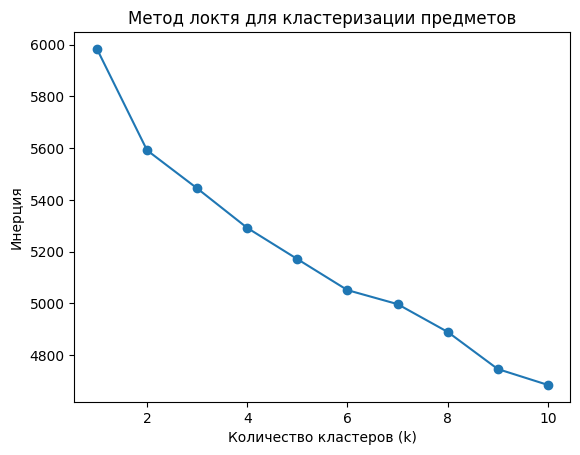


Соответствие предметов кластерам:
Основы информационной безопасности: Кластер 1
Проектирование информационных систем: Кластер 1
Критическое и системное мышление: Кластер 1
Базы данных: Кластер 0
Нейросетевые технологии: Кластер 0
Объектно-ориентированное программирование: Кластер 0
Теория вероятностей и математическая статистика: Кластер 0
Исследование операций: Кластер 1
( дисциплина по выбору ): Кластер 1
Мониторинг безопасности информационных систем: Кластер 0
Введение в веб-технологии: Кластер 0
Физическая культура и спорт: Кластер 0
История России: Кластер 0
Основы инклюзивного взаимодействия: Кластер 0
Основы проектной деятельности: Кластер 0
Методы анализа данных: Кластер 0
Технологии разработки программных комплексов: Кластер 0
Анализ бизнес-процессов: Кластер 0
Введение в AR/VR технологии: Кластер 0
Инженерная графика: Кластер 1
Основы российской государственности: Кластер 1
Правоведение: Кластер 0
Моделирование процессов и систем: Кластер 0
Управление проектами: Кластер 1
Ос

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# 1. Подготовка данных для кластеризации (3 курс)
semester_5_6_data = students.iloc[364:524].copy()  # Копируем данные студентов 3 курса

# 2. Выбор признаков для кластеризации (только предметы 3 курса)
all_subjects_3rd_year = set()
for grades_dict in semester_5_6_data['Grades_Dict']:  # Итерируемся только по данным 3 курса
    all_subjects_3rd_year.update(grades_dict.keys())  # Добавляем все предметы 3 курса в множество

features_for_clustering = list(all_subjects_3rd_year)  # Преобразуем множество в список

# 3. Замена "Долг" на -1 (без изменений)
for subject in features_for_clustering:  # Итерируемся по предметам 3 курса
    semester_5_6_data[subject] = semester_5_6_data[subject].replace('Долг', -1).astype(float)

# 4. Обработка нулей (замена на NaN)
for subject in features_for_clustering:  # Итерируемся по предметам 3 курса
    semester_5_6_data[subject] = semester_5_6_data[subject].replace(0, np.nan)


# 5. Масштабирование данных (с использованием маски для исключения NaN)
numeric_data = semester_5_6_data[features_for_clustering].copy()  # Копируем данные для масштабирования

# Создание маски (исключает NaN)
mask = ~numeric_data.isna()  # True, если значение не NaN

scaler = StandardScaler()  # Создаем объект StandardScaler
scaled_values = scaler.fit_transform(numeric_data[mask])  # Масштабируем данные, используя маску
numeric_data[mask] = scaled_values  # Возвращаем масштабированные данные в DataFrame
scaled_data = numeric_data  # Переименовываем для ясности

# 6. Определение оптимального числа кластеров (метод локтя)
inertia = []  # Список для хранения значений инерции
for k in range(1, 11):  # Проверяем k от 1 до 10
    kmeans = KMeans(n_clusters=k, random_state=42)  # Создаем объект KMeans
    kmeans.fit(scaled_data.fillna(0))  # Заполняем NaN нулями только для метода локтя и обучаем модель
    inertia.append(kmeans.inertia_)  # Добавляем значение инерции в список

plt.plot(range(1, 11), inertia, marker='o')  # Строим график
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Инерция")
plt.title("Метод локтя для кластеризации предметов")
plt.show()  # Показываем график


k = 2  # Выбираем k на основе графика (хотя там вообще один кластер можно бы поставить)

# 7. Применение KMeans для кластеризации предметов (с учетом NaN и транспонированием)
def nan_euclidean_distance(X, Y):  # Функция для вычисления расстояния с учетом NaN
    return np.sqrt(np.nansum((X - Y)**2, axis=0))  # axis=0 для кластеризации предметов

scaled_data_transposed = scaled_data.T  # Транспонируем данные для кластеризации предметов

kmeans = KMeans(n_clusters=k, random_state=42)  # Создаем объект KMeans
distance_matrix = pairwise_distances(scaled_data_transposed.fillna(0), metric=nan_euclidean_distance)  # Вычисляем матрицу расстояний, заполняя NaN нулями только здесь

kmeans.fit(distance_matrix)  # Обучаем KMeans на матрице расстояний
subject_clusters = kmeans.labels_  # Получаем метки кластеров для предметов

# 8. Добавление информации о кластерах для предметов
subject_cluster_mapping = dict(zip(all_subjects_3rd_year, subject_clusters)) # Создаем словарь {предмет: номер_кластера}
print("\nСоответствие предметов кластерам:")
for subject, cluster in subject_cluster_mapping.items(): # Выводим результаты
    print(f"{subject}: Кластер {cluster}")

In [ ]:
# 1. Подготовка данных (3 курс)
semester_5_6_data = students.iloc[364:728].copy()

# 2. Выбор признаков (только предметы 3 курса)
all_subjects_3rd_year = set()
for grades_dict in semester_5_6_data['Grades_Dict']:
    all_subjects_3rd_year.update(grades_dict.keys())
features_for_clustering = list(all_subjects_3rd_year)


# 3. Замена "Долг" на -1
for subject in features_for_clustering:
    semester_5_6_data[subject] = semester_5_6_data[subject].replace('Долг', -1).astype(float)

# 5. Масштабирование данных
numeric_data = semester_5_6_data[features_for_clustering].copy()  # Копируем данные для масштабирования

# Создание маски (исключает NaN)
mask = ~numeric_data.isna()  # True, если значение не NaN

scaler = StandardScaler()  # Создаем объект StandardScaler
scaled_values = scaler.fit_transform(numeric_data[mask])  # Масштабируем данные, используя маску
numeric_data[mask] = scaled_values  # Возвращаем масштабированные данные в DataFrame
scaled_data = numeric_data  # Переименовываем для ясности

/tmp/ipykernel_372/2189891789.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  semester_5_6_data[subject] = semester_5_6_data[subject].replace('Долг', -1).astype(float)
/tmp/ipykernel_372/2189891789.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  semester_5_6_data[subject] = semester_5_6_data[subject].replace('Долг', -1).astype(float)
/tmp/ipykernel_372/2189891789.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resu

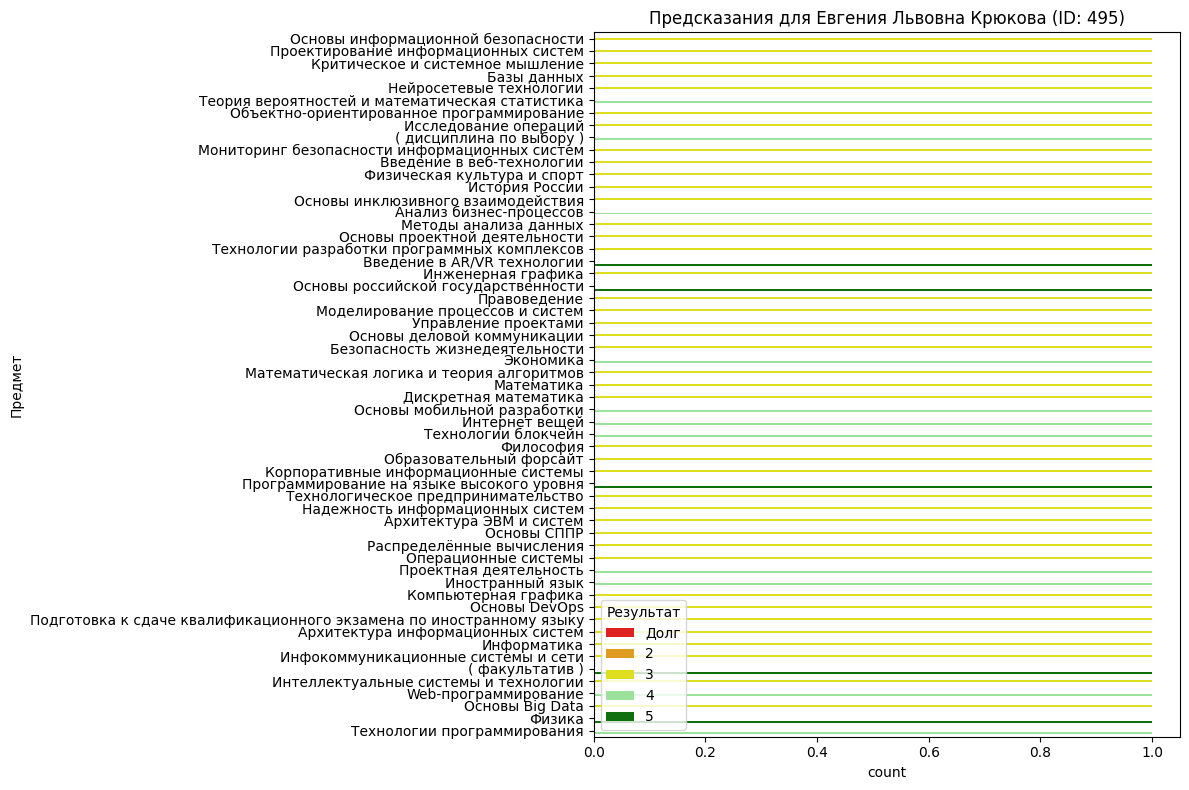


Предсказанные результаты для Евгения Львовна Крюкова:
                                                            Предмет Результат
                                 Основы информационной безопасности         3
                                     Безопасность жизнедеятельности         3
                          Математическая логика и теория алгоритмов         3
                                              Дискретная математика         3
                                                          Философия         3
                                            Образовательный форсайт         3
                               Корпоративные информационные системы         3
                                Технологическое предпринимательство         3
                                   Надежность информационных систем         3
                                           Архитектура ЭВМ и систем         3
                                        Основы деловой коммуникации         3
         

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# --- Подготовка данных ---

def prepare_data(students):
    # Создаем отдельные колонки для каждого предмета
    all_subjects = set()
    for grades in students['Grades_Dict']:
        all_subjects.update(grades.keys())

    for subject in all_subjects:
        students[subject] = students['Grades_Dict'].apply(lambda x: x.get(subject, np.nan))

    # Обработка долгов и пропущенных значений
    students.replace('Долг', -1, inplace=True)
    students.fillna(0, inplace=True)
    return students, list(all_subjects)

# Загрузка данных
students = pd.read_csv('/kaggle/input/with-predmet/project_db.csv', sep=';')
students['Grades_Dict'] = students['All_Grades_Per_Subject'].apply(
    lambda x: {} if pd.isna(x) else {s.strip(): float(g.strip())
                                   for part in x.split(';')
                                   if ':' in part
                                   for s, g in [part.strip().split(':')]})

students, all_subjects = prepare_data(students)

# Разделение на курсы
train_data = students.iloc[364:524].copy()
predict_data = students.iloc[525:760].copy()

# Определяем общие предметы
common_subjects = list(set(train_data.columns).intersection(set(predict_data.columns)) & set(all_subjects))

# --- Обучение и предсказание ---

# Создаем пайплайн для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='mean'), common_subjects)
    ])

predictions = pd.DataFrame(index=predict_data.index)

for subject in common_subjects:
    # Подготовка данных
    X_train = train_data[common_subjects]
    y_train = train_data[subject]

    # Явно создаем 5 категорий (включая долги)
    y_train_cat = pd.cut(y_train,
                        bins=[-2, -0.5, 2.5, 3.5, 4.5, 5.5],
                        labels=['Долг', '2', '3', '4', '5'],
                        include_lowest=True)  # Важно!

    # Удаляем только нули (не трогая долги)
    valid_idx = (y_train != 0) | (y_train == -1)  # Сохраняем и оценки, и долги
    X_train = X_train[valid_idx]
    y_train_cat = y_train_cat[valid_idx].dropna()

    if len(y_train_cat) < 10:
        print(f"Недостаточно данных для предмета {subject}")
        continue

    # Создаем и обучаем модель
    model = make_pipeline(
        preprocessor,
        RandomForestClassifier(random_state=42)
    )
    model.fit(X_train, y_train_cat)

    # Предсказание
    X_predict = predict_data[common_subjects]
    y_pred = model.predict(X_predict)
    predictions[subject] = y_pred

# Добавляем предсказания
predict_data = pd.concat([predict_data, predictions.add_prefix('Predicted_')], axis=1)

# --- Визуализация ---

def show_student_predictions(student_id):
    student = predict_data[predict_data['Student_ID'] == student_id].iloc[0]
    pred_grades = student.filter(like='Predicted_').copy() # <--- Создаем копию!

    # Теперь изменяем индекс копии
    pred_grades.index = pred_grades.index.str.replace('Predicted_', '')

    # Создаем DataFrame для визуализации (важно!)
    grades_df = pd.DataFrame({
        'Предмет': pred_grades.index,
        'Результат': pred_grades.values
    })

    order = ['Долг', '2', '3', '4', '5']
    grades_df['Результат'] = grades_df['Результат'].astype('category').cat.set_categories(order)

    plt.figure(figsize=(12, 8))
    sns.countplot(y='Предмет', hue='Результат', data=grades_df, hue_order=order,
                 palette={'Долг': 'red', '2': 'orange', '3': 'yellow',
                         '4': 'lightgreen', '5': 'green'}) # Используем DataFrame
    plt.title(f'Предсказания для {student["Name"]} (ID: {student_id})')
    plt.tight_layout()
    plt.show()

    print(f"\nПредсказанные результаты для {student['Name']}:")
    print(grades_df.sort_values('Результат').to_string(index=False))


def analyze_student(student_id):
    student = predict_data[predict_data['Student_ID'] == student_id].iloc[0]
    pred_grades = student.filter(like='Predicted_')

    print(f"\nАнализ успеваемости для {student['Name']}:")
    print(f"Отлично (5): {(pred_grades == '5').sum()}")
    print(f"Хорошо (4): {(pred_grades == '4').sum()}")
    print(f"Удовлетворительно (3): {(pred_grades == '3').sum()}")
    print(f"Неудовлетворительно (2): {(pred_grades == '2').sum()}")
    print(f"Долги: {(pred_grades == 'Долг').sum()}")

    print("\nПредметы с долгами:")
    print(pred_grades[pred_grades == 'Долг'].to_string())

    print("\nПредметы с отличными оценками (5):")
    print(pred_grades[pred_grades == '5'].to_string())

    print("\nПредметы с хорошими оценками (4):")
    print(pred_grades[pred_grades == '4'].to_string())

# Пример использования
show_student_predictions(495)
analyze_student(495)

# Сохранение результатов
predict_data.to_csv('student_predictions_with_debts.csv', index=False)